In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px


In [2]:
standard_mse = np.load('standard_mse.npy')
mse_1 = np.load('mse_1.npy')
mse_6 = np.load('mse_6.npy')

In [32]:
is_percentile = False
_df_1 = pd.DataFrame(standard_mse, columns=['all points'])
_df_2 = pd.DataFrame(mse_1, columns=['first point'])
_df_3 = pd.DataFrame(mse_6, columns=['6 points'])

fig = px.ecdf(_df_1, x=_df_1.columns.to_list(), labels={'A': 'all points'})
fig.add_trace(px.ecdf(_df_2, x=_df_2.columns.to_list(), color_discrete_sequence=['#37AA9C']).data[0])
fig.add_trace(px.ecdf(_df_3, x=_df_3.columns.to_list(), color_discrete_sequence=['#F75000']).data[0])
# fig.update_layout(title='MSE', width=1000, height=800)
fig.update_layout(title='CDF of MSE in different point length', width=800, height=600, xaxis_range=[0, 200], xaxis_title='MSE', legend_title='')
if is_percentile == True:
    fig.update_xaxes(range=[0.0, 2.0])
    
fig


In [24]:
_df_1

,0
0,13.307130
1,13.511772
2,16.283970
3,18.891058
4,32.442875
...,...
7803,1.042673
7804,0.496356
7805,0.922723
7806,0.529634


In [6]:
is_percentile = False
_df = pd.DataFrame(best_mse)
fig = px.ecdf(_df, x=_df.columns.to_list())
fig.update_layout(title='MSE', width=1000, height=800)
if is_percentile == True:
    fig.update_xaxes(range=[0.0, 2.0])
    
fig


In [60]:
hist_data = [gelu_mse, closs6_mse]

group_labels = ['base', 'hybrid']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

# Add title
# fig.update_layout(title_text='MSE')
fig.show()

In [61]:
hist_data = [gelu_nrmse]

group_labels = ['NRMSE']
colors = ['#333F44']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
# fig.update_layout(title_text='MSE')
fig.show()

In [63]:
# hist_data = [gelu_mms, relu_mms, sigmoid_mms, softplus_mms]

# group_labels = ['gelu', 'relu', 'sigmoid', 'softplus']
# colors = ['#333F44', '#37AA9C', '#94F3E4', '#F75000']

# # Create distplot with curve_type set to 'normal'
# fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# # Add title
# # fig.update_layout(title_text='MSE')
# fig.show()

In [64]:
hist_data = [gelu_r2, relu_r2, sigmoid_r2, softplus_r2]

group_labels = ['gelu', 'relu', 'sigmoid', 'softplus']
colors = ['#333F44', '#37AA9C', '#94F3E4', '#F75000']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
# fig.update_layout(title_text='MSE')
fig.show()

NameError: name 'relu_r2' is not defined

In [ ]:
smse = np.load('s_mse.npy')

In [ ]:
hist_data = [smse/max(smse)-min(smse), gelu_mse/max(gelu_mse)-min(gelu_mse)]

group_labels = ['base', 'hybrid']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
# fig.update_layout(title_text='MSE')
fig.show()

NameError: name 'smse' is not defined

In [ ]:
goutmse = np.load('gelu_out_mse.npy')
goutmms = np.load('gelu_out_mms.npy')

In [65]:
hist_data = [gelu_mse, goutmse]

group_labels = ['standard', 'minmax']
colors = ['#333F44', '#37AA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)

# Add title
# fig.update_layout(title_text='MSE')
fig.show()

NameError: name 'goutmse' is not defined

[Text(0.5, 0, 'MSE')]

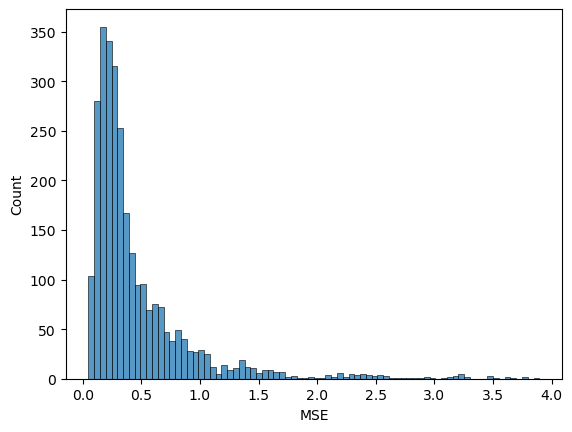

In [ ]:
ax = sns.histplot(data=mse)
ax.set(xlabel='MSE')

[Text(0.5, 0, 'MAE')]

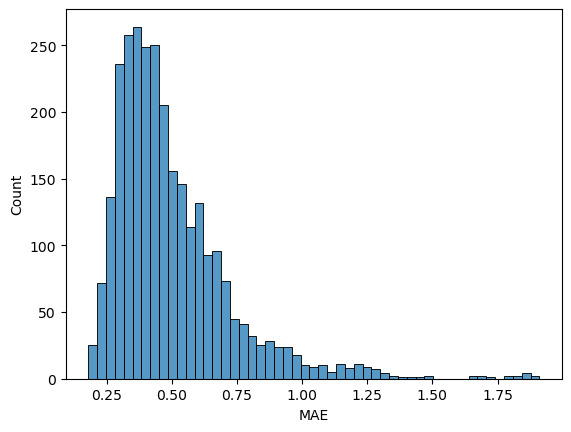

In [ ]:
ax = sns.histplot(data=mae)
ax.set(xlabel='MAE')

In [ ]:
mse_max = mse.index(max(mse))
mse_min = mse.index(min(mse))
mse_max, mse_min

(1467, 1340)

In [ ]:
mae_max = mae.index(max(mae))
mae_min = mae.index(min(mae))
mae_max, mae_min

(1467, 1340)

In [ ]:
def get_time(index):
    t_slice = timestamp['datetime'][index:index + pred_length]
    return t_slice
    

In [ ]:
def make_plot(index):
    t = get_time(index)
    plt.figure(figsize=(15, 4))
    plt.plot(df_raw['datetime'][test_start + index - seq_len:test_start + index], df_raw['use'][test_start + index - seq_len:test_start + index])
    plt.plot(t, true_inverse[index], color='green', label='real', linewidth=2)
    plt.plot(t, pred_inverse[index], color='red', label='predict', linewidth=2)
    plt.ylabel('Total load [kW]', fontsize=12)
    plt.legend(fontsize=10)
    plt.title('Total load real vs predict', fontsize=12)
    plt.show()

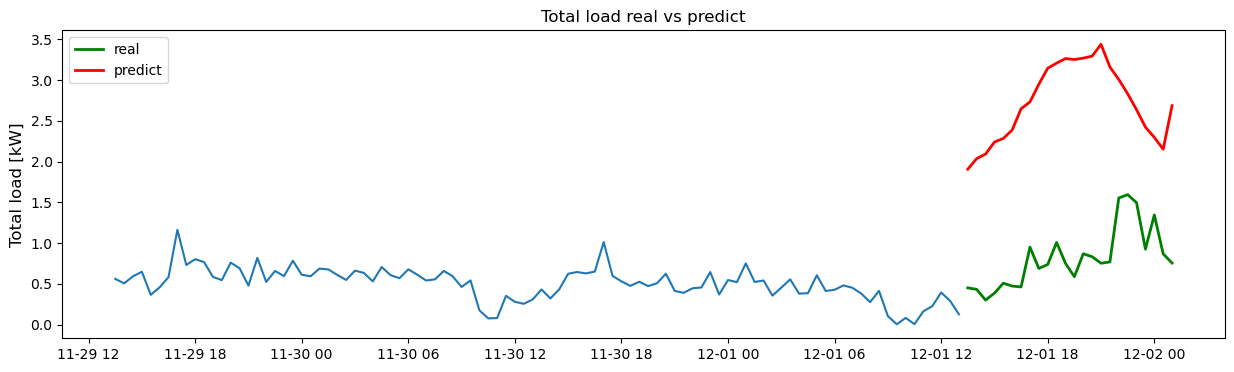

In [ ]:
make_plot(mse_max)

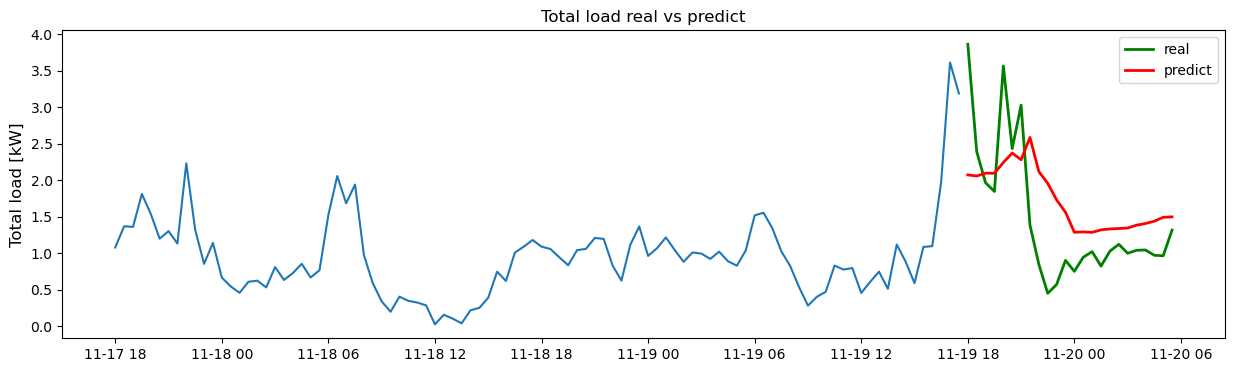

In [ ]:
make_plot(900)

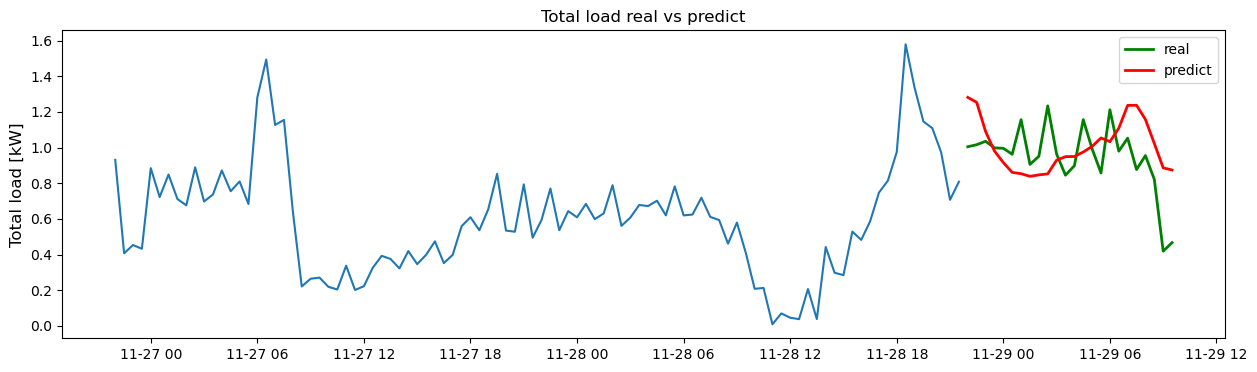

In [ ]:
make_plot(mse_min)

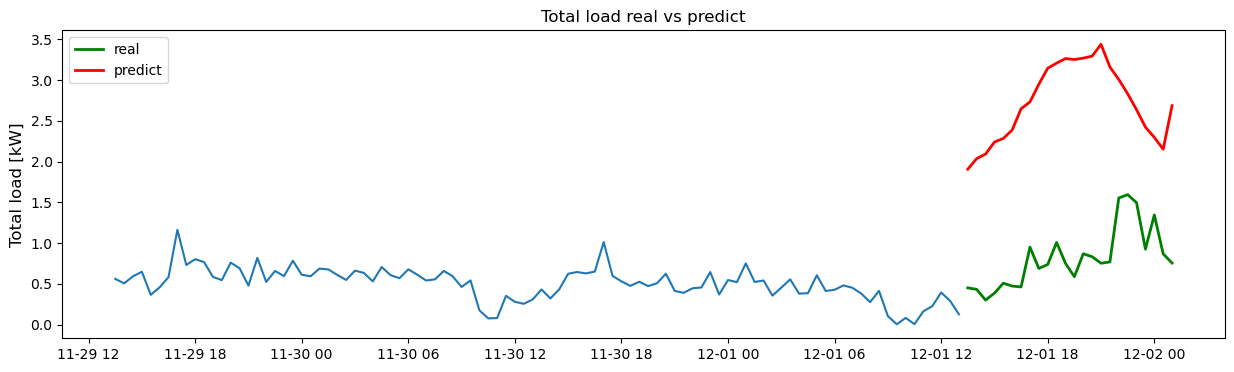

In [ ]:
make_plot(mae_max)

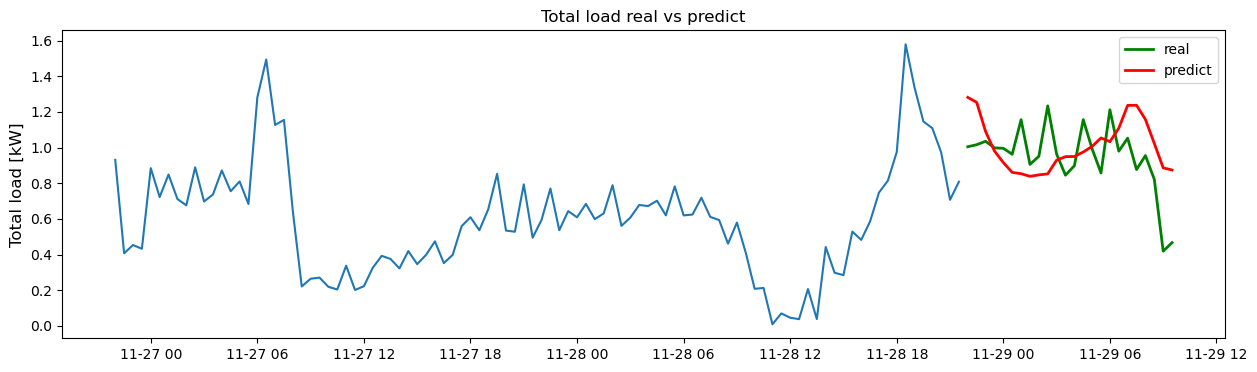

In [ ]:
make_plot(mae_min)

In [ ]:
def make_multi_plot(start, end):
    for i in np.arange(start, end, 1):
        t = get_time(i)
        plt.figure(figsize=(15, 4))
        plt.plot(df_raw['datetime'][test_start + i - seq_len:test_start + i], df_raw['use'][test_start + i - seq_len:test_start + i])
        plt.plot(t, true_inverse[i], color='green', label='real', linewidth=2)
        plt.plot(t, pred_inverse[i], color='red', label='predict', linewidth=2)
        plt.ylabel('Total load [kW]', fontsize=12)
        plt.legend(fontsize=10)
        plt.title('Total load real vs predict', fontsize=12)
        plt.savefig('C:/Users/stanhuang/Documents/HEMS/Fed/新增資料夾/figure/temp{}.png'.format(i))
        plt.clf()

In [ ]:
make_multi_plot(0, 100)

C:\Users\stanhuang\AppData\Local\Temp\ipykernel_23936\3568876684.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>